### MNIST Dataset
- Load and visualise the dataset
- Basically a dataset of handwriting images, labelled for us
- The 784 columns are the pixel values of different images

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [11]:
df = pd.read_csv("MNIST-2/mnist_train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.shape

(21237, 785)

Segregating the dataset in $x$ (features) and $y$ (labels)

In [13]:
data = df.values

In [14]:
X = data[:, 1:]
Y = data[:, 0]

In [15]:
print(X.shape, Y.shape)

(21237, 784) (21237,)


### Visualising a single image
- Take a row and plot the image
- The image is a 28x28 image

In [24]:
def drawImage(X, Y, i):
    # Its a single channel image
    # but matplotlib allots any color of its choice 
    # so we assign gray to inform it
    plt.imshow(X[i].reshape(28,28), cmap="gray")
    plt.title(f"Label: {Y[i]}")
    plt.show()

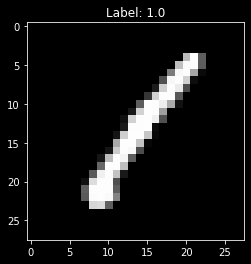

In [25]:
drawImage(X,Y,0)

Visualising the first 5 images:

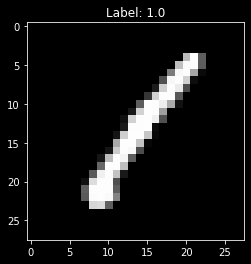

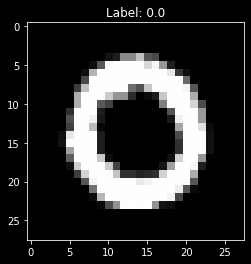

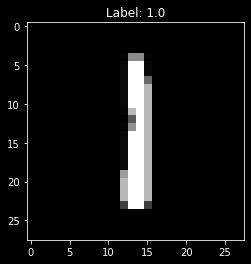

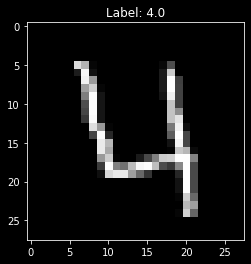

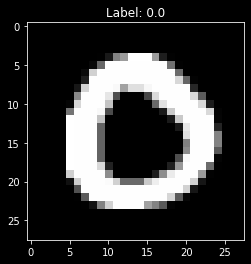

In [26]:
for i in range(5):
    drawImage(X, Y, i)

#### Splitting the dataset in test and train values
- Generally we take 80% of the data to train

In [29]:
split = int(0.8 * X.shape[0])
split

16989

In [30]:
X_train, Y_train = X[:split, :], Y[:split]
X_test, Y_test = X[split:, :], Y[split:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(16989, 784) (16989,)
(4248, 784) (4248,)


But this can lead to false training and testing, because sometimes the data is ordered, like all 0s first then 1s, and so on, so its best to shuffle the data

This can be done by `np.random.shuffle`
Like `np.random.shuffle(data)`

In [31]:
np.random.shuffle(data)

In [32]:
X_train, Y_train = X[:split, :], Y[:split]
X_test, Y_test = X[split:, :], Y[split:]

Now we get the proper segregations

#### Plotting a grid of 5x5 images in one image
- Matplotlib has a concept of `subplots`

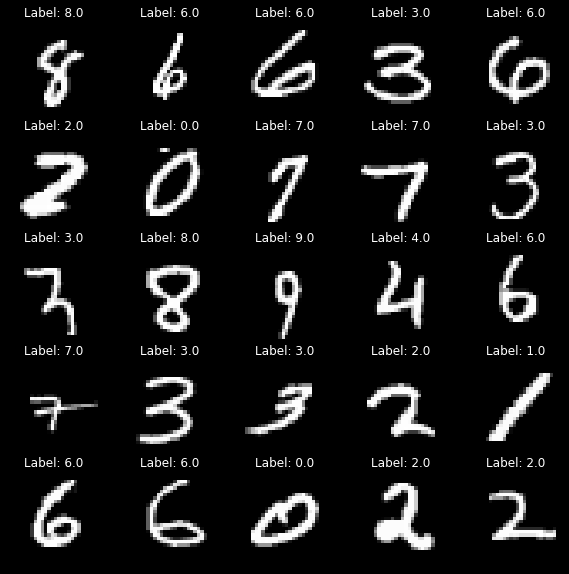

In [40]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title(f"Label: {Y_train[i]}")
    plt.axis("off")
    plt.imshow(X_train[i].reshape(28,28), cmap="gray")

plt.show()

#### Another method of splitting in test train parts
- Using `train_test_split` of sklearn library
- We give the test size percentage (Here 20%)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
XT, Xt, YT, Yt = train_test_split(X, Y, test_size=0.2)

print(XT.shape, YT.shape)
print(Xt.shape, Yt.shape)

(16989, 784) (16989,)
(4248, 784) (4248,)


We get a similar result, also this is more optimised and proper for splitting, handling shuffling and everything

For consistent dataset, we can use the `random_state` attribute, for the same data split

```py
XT, Xt, YT, Yt = train_test_split(X, Y, test_size=0.2, random_state=5)
                                                         ^^^^^
```